In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [199]:
X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_redundant=0, 
                           weights=[.9, .1], 
                           flip_y=0.05, 
                           random_state=8)

In [200]:
df = pd.DataFrame(data = {"x1": X[:,0], "x2": X[:,1], "y": y})
df.head()

,x1,x2,y
0,0.861562,1.219251,0
1,-2.160008,0.250352,0
2,-1.368230,-0.072432,1
3,-0.269227,-1.254264,0
4,0.470164,-0.586159,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

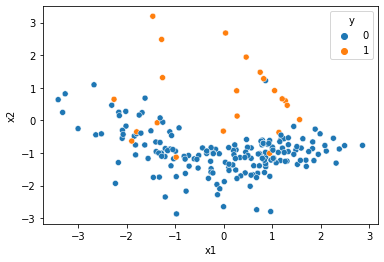

In [201]:
sns.scatterplot(x=df["x1"], y=df["x2"], hue=df["y"])

In [202]:
classes, counts = np.unique(df["y"], return_counts=True)
classes, counts

(array([0, 1]), array([178,  22]))

In [203]:
minority_class = classes[np.argmin(counts)]
minority_class_sample_counts = counts[np.argmin(counts)]
majority_class = classes[np.argmax(counts)]
majority_class_sample_counts = counts[np.argmax(counts)]

In [204]:
print(f"Majority class: {majority_class}. Sample counts: {majority_class_sample_counts}")
print(f"Minority class: {minority_class}. Sample counts: {minority_class_sample_counts}")

Majority class: 0. Sample counts: 178
Minority class: 1. Sample counts: 22


In [205]:
# Dataset imbalanced

In [206]:
X = df.loc[:,["x1", "x2"]]
y = df["y"]

In [207]:
df_class_0 = df[df["y"]==0]
df_class_1 = df[df["y"]==1]

# Techniques

<img src="simple_over_under_sampling.png">

## 1. Simple undersampling

In [208]:
df_class_0_us = df_class_0.sample(minority_class_sample_counts)
df_us = pd.concat([df_class_0_us, df_class_1])
classes, counts = np.unique(df_us["y"], return_counts=True)
classes, counts

(array([0, 1]), array([22, 22]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

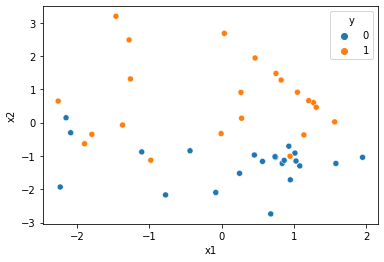

In [209]:
sns.scatterplot(x=df_us["x1"], y=df_us["x2"], hue=df_us["y"])

## 2. Simple oversampling

In [210]:
df_class_1_os = df_class_1.sample(majority_class_sample_counts, replace=True)
df_os = pd.concat([df_class_1_os, df_class_0])
classes, counts = np.unique(df_os["y"], return_counts=True)
classes, counts

(array([0, 1]), array([178, 178]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

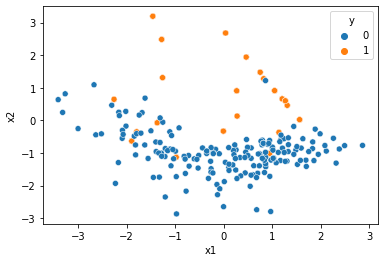

In [211]:
sns.scatterplot(x=df_os["x1"], y=df_os["x2"], hue=df_os["y"])

## 3. Simple undersampling with imblearn
https://imbalanced-learn.org/stable/under_sampling.html#controlled-under-sampling-techniques

In [212]:
from imblearn.under_sampling import RandomUnderSampler

In [213]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

In [214]:
classes, counts = np.unique(y_rus, return_counts=True)
classes, counts

(array([0, 1]), array([22, 22]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

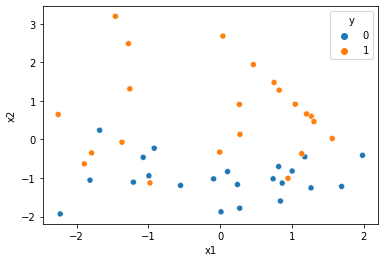

In [215]:
sns.scatterplot(x=X_rus["x1"], y=X_rus["x2"], hue=y_rus)

## 4. Simple oversampling with imblearn
https://imbalanced-learn.org/stable/over_sampling.html#naive-random-over-sampling

In [216]:
from imblearn.over_sampling import RandomOverSampler

In [217]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [218]:
classes, counts = np.unique(y_ros, return_counts=True)
classes, counts

(array([0, 1]), array([178, 178]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

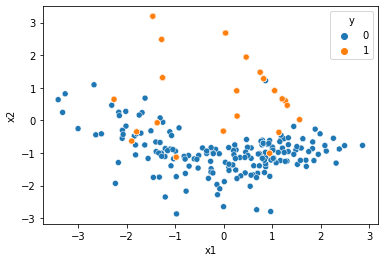

In [219]:
sns.scatterplot(x=X_ros["x1"], y=X_ros["x2"], hue=y_ros)

## 5. Cleaning undersampling. Tomek links
https://imbalanced-learn.org/stable/under_sampling.html#tomek-s-links

<img src="tomek.png">

In [220]:
from imblearn.under_sampling import TomekLinks

In [221]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [222]:
classes, counts = np.unique(y_tl, return_counts=True)
classes, counts

(array([0, 1]), array([169,  22]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

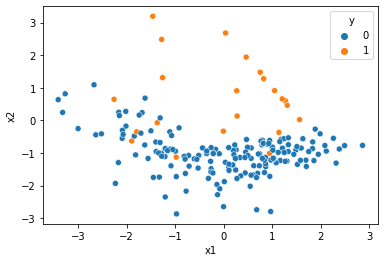

In [223]:
sns.scatterplot(x=X_tl["x1"], y=X_tl["x2"], hue=y_tl)

## 6. Cleaning undersampling. Nearest neighbours
https://imbalanced-learn.org/stable/under_sampling.html#edited-data-set-using-nearest-neighbours

In [224]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
classes, counts = np.unique(y_enn, return_counts=True)
classes, counts

(array([0, 1]), array([157,  22]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

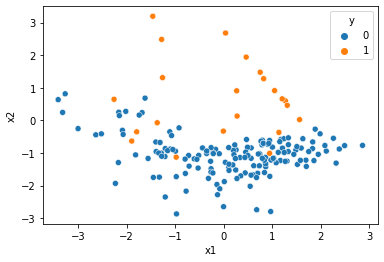

In [225]:
sns.scatterplot(x=X_enn["x1"], y=X_enn["x2"], hue=y_enn)

## 7. Undersampling. Cluster Centroids
https://imbalanced-learn.org/stable/under_sampling.html#prototype-generation

In [226]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy='majority')
X_cc, y_cc = cc.fit_resample(X, y)
classes, counts = np.unique(y_cc, return_counts=True)
classes, counts

(array([0, 1]), array([22, 22]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

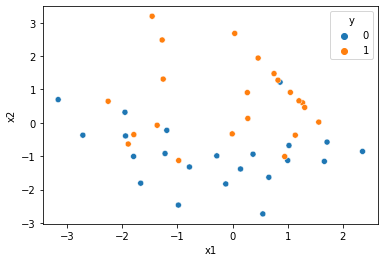

In [227]:
sns.scatterplot(x=X_cc["x1"], y=X_cc["x2"], hue=y_cc)

## 8. Oversampling. Synthetic Minority Oversampling Technique (SMOTE)
https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

<img src="smote.png">

In [228]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)
classes, counts = np.unique(y_smote, return_counts=True)
classes, counts

(array([0, 1]), array([178, 178]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

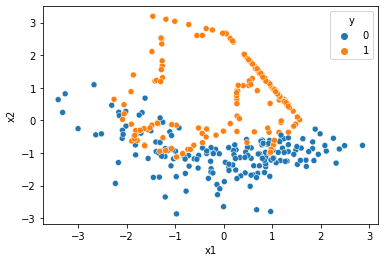

In [229]:
sns.scatterplot(x=X_smote["x1"], y=X_smote["x2"], hue=y_smote)

## 9. Over-sampling using SMOTE and cleaning using Tomek links
https://imbalanced-learn.org/stable/combine.html#combination-of-over-and-under-sampling

In [230]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek()
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)
classes, counts = np.unique(y_smote_tomek, return_counts=True)
classes, counts

(array([0, 1]), array([165, 165]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

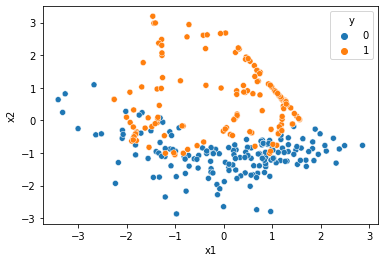

In [231]:
sns.scatterplot(x=X_smote_tomek["x1"], y=X_smote_tomek["x2"], hue=y_smote_tomek)

## 10. Over-sampling using SMOTE and cleaning using Edited Nearest Neighbours
https://imbalanced-learn.org/stable/combine.html#combination-of-over-and-under-sampling

In [232]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X, y)
classes, counts = np.unique(y_smote_enn, return_counts=True)
classes, counts

(array([0, 1]), array([125, 131]))

<AxesSubplot:xlabel='x1', ylabel='x2'>

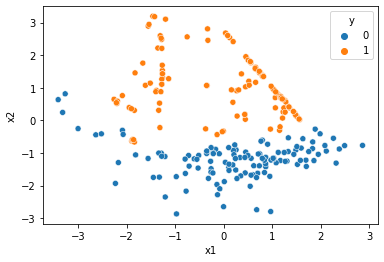

In [233]:
sns.scatterplot(x=X_smote_enn["x1"], y=X_smote_enn["x2"], hue=y_smote_enn)

# Real data

In [234]:
df = pd.read_csv('weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [235]:
df_preprocessing = df.dropna(subset=['RainTomorrow'])
df_preprocessing = df_preprocessing.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date'], axis=1)
df_preprocessing.dropna(inplace=True)
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

In [236]:
X = df_preprocessing.loc[:, 'Location':'RainToday']
y = df_preprocessing['RainTomorrow'].astype('category').cat.codes

In [237]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [238]:
classes, counts = np.unique(y, return_counts=True)
classes, counts

(array([0, 1], dtype=int8), array([87906, 25019]))

In [239]:
minority_class = classes[np.argmin(counts)]
minority_class_sample_counts = counts[np.argmin(counts)]
majority_class = classes[np.argmax(counts)]
majority_class_sample_counts = counts[np.argmax(counts)]
print(f"Majority class: {majority_class}. Sample counts: {majority_class_sample_counts}")
print(f"Minority class: {minority_class}. Sample counts: {minority_class_sample_counts}")

Majority class: 0. Sample counts: 87906
Minority class: 1. Sample counts: 25019


In [240]:
# Dataset imbalanced

In [241]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X[numerical_columns], y, test_size=0.2)

In [255]:
def fit_predict(X_train, X_test, y_train, y_test):
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_hat = xgb.predict(X_test)
    dict_ = classification_report(y_test, y_hat, output_dict=True)
    str_ = classification_report(y_test, y_hat)    
    return str_, dict_    

In [256]:
imbalanced_set_metrics_str, imbalanced_set_metrics_dict = fit_predict(X_train, X_test, y_train, y_test)

In [257]:
print(imbalanced_set_metrics_str)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     17543
           1       0.76      0.54      0.63      5042

    accuracy                           0.86     22585
   macro avg       0.82      0.75      0.77     22585
weighted avg       0.85      0.86      0.85     22585



In [246]:
def balance_dataset(X, y, estimator):
    model = estimator()
    return model.fit_resample(X, y)

In [247]:
estimators = [RandomUnderSampler, RandomOverSampler, TomekLinks, EditedNearestNeighbours, 
              SMOTE, SMOTETomek, SMOTEENN]

In [266]:
estimators_to_metrics = {"None": imbalanced_set_metrics_dict}
for estimator in estimators:
    print(f"***********{estimator.__name__}***********")
    X_train_resample, y_train_resample = balance_dataset(X_train, y_train, estimator)
    classes, counts = np.unique(y_train_resample, return_counts=True)
    print(f"Classes: {classes}. Sample counts: {counts}")
#     X_test_resample, y_test_resample = balance_dataset(X_test, y_test, estimator)    
    balanced_set_metrics_str, balanced_set_metrics_dict = fit_predict(X_train_resample, X_test, 
                                                                      y_train_resample, y_test)
    estimators_to_metrics[estimator.__name__]= balanced_set_metrics_dict
    print(balanced_set_metrics_str)    

***********RandomUnderSampler***********
Classes: [0 1]. Sample counts: [19977 19977]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     17543
           1       0.54      0.79      0.64      5042

    accuracy                           0.80     22585
   macro avg       0.73      0.80      0.75     22585
weighted avg       0.84      0.80      0.81     22585

***********RandomOverSampler***********
Classes: [0 1]. Sample counts: [70363 70363]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     17543
           1       0.58      0.76      0.65      5042

    accuracy                           0.82     22585
   macro avg       0.75      0.80      0.77     22585
weighted avg       0.85      0.82      0.83     22585

***********TomekLinks***********
Classes: [0 1]. Sample counts: [66308 19977]
              precision    recall  f1-score   support

           0       0.89      0.94      0.9

## Conclusion

In [270]:
print(f"Imbalanced dataset. F1 score of label 1 = {estimators_to_metrics['None']['1']['f1-score']}")
print(f"Imbalanced dataset with undersampling. Tomek links. F1 score of label 1 = {estimators_to_metrics['TomekLinks']['1']['f1-score']}")

Imbalanced dataset. F1 score of label 1 = 0.6336221837088387
Imbalanced dataset with undersampling. Tomek links. F1 score of label 1 = 0.6474804278310728


In [ ]:
# Not great result, but 1.5% id also good 

## Reference

<div>1. <a src="https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook">https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook</a></div>
<div>2. <a src="https://github.com/scikit-learn-contrib/imbalanced-learn#id25">https://github.com/scikit-learn-contrib/imbalanced-learn#id25</a></div>